In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import fooof
print(fooof.__version__)

1.0.1-dev


Many things I can do with xarray

In [5]:
from pathlib import Path, PurePath
from glob import glob
import scipy.io  as sio
import numpy as np
import re
import xarray as xr
import pandas as pd


pandas_list = []
folder ='../data/lemon_rsEEG_dataset'
files_EC = [Path(p) for p in glob(f"{folder}/*/*EC.mat")]


data_arrays_128freq = []
data_arrays_52freq = []
sub_128freq = []
sub_52freq= []

for path_mat in files_short:
    sub = re.findall("sub-[0-9]{6}", str(path_mat))
    mat_content = sio.loadmat(path_mat)
    roi_names=  [l.flatten()[0] for l in mat_content["RowNames"].flatten()] #flatten
    freqs = np.ndarray.squeeze(mat_content["Freqs"])
    tf = mat_content["TF"]
    da = xr.DataArray(tf, dims=['roi_names', 'sub','freqs',], coords={'roi_names': roi_names, 'sub': sub,  'freqs': freqs})
    if freqs.size >  51:
        data_arrays_128freq.append(da)
        sub_128freq.append(sub)
    else:
        data_arrays_52freq.append(da)
        sub_52freq.append(sub)

psd_concat_freq128 = xr.concat(data_arrays_128freq , dim='sub', coords='all', join='override')
psd_concat_freq128.to_netcdf("data/freq128.nc")
display(f"psd_concat_freq128 is {len(sub_128freq)} elements")


psd_concat_freq52 = xr.concat(data_arrays_52freq  , dim='sub', coords='all', join='override')
psd_concat_freq52.to_netcdf("data/freq52.nc")
display(f"psd_concat_freq52 is {len(sub_52freq)} elements")




'psd_concat_freq128 is 199 elements'

'psd_concat_freq52 is 2 elements'

In [8]:
psd_concat_freq128
display(psd_concat_freq52)

<xarray.DataArray (roi_names: 68, sub: 2, freqs: 51)>
array([[[1.88213908e-18, 6.03331863e-18, 7.49592372e-18, ...,
         5.75011330e-22, 2.45277256e-22, 1.99208111e-22],
        [3.72154957e-19, 1.23174760e-18, 1.57878329e-18, ...,
         1.82782984e-22, 5.57323569e-23, 3.63208459e-23]],

       [[1.35387244e-18, 4.26289566e-18, 4.47864870e-18, ...,
         7.15771658e-22, 1.99641419e-22, 1.26545808e-22],
        [3.93271042e-19, 1.29048058e-18, 1.67720883e-18, ...,
         2.48680298e-22, 7.16495654e-23, 4.82450454e-23]],

       [[4.25058034e-19, 1.41701665e-18, 1.75687761e-18, ...,
         1.44940205e-22, 4.76561942e-23, 3.50269889e-23],
        [1.24657202e-19, 4.07403849e-19, 5.87972749e-19, ...,
         1.53560976e-22, 3.67605405e-23, 2.21713113e-23]],

       ...,

       [[4.08954227e-19, 1.38874664e-18, 1.90088754e-18, ...,
         2.14230757e-22, 5.96638273e-23, 3.64408556e-23],
        [1.93303691e-19, 6.06276176e-19, 7.34329823e-19, ...,
         1.15460557e-22, 2.89267873e-23, 1.85902944e-23]],

       [[4.14494110e-19, 1.35829311e-18, 1.85876123e-18, ...,
         1.77159635e-22, 6.97562217e-23, 5.44811845e-23],
        [1.05534479e-19, 3.38165445e-19, 4.29095345e-19, ...,
         6.93576227e-23, 1.87838523e-23, 1.20421657e-23]],

       [[3.55607218e-19, 1.15204942e-18, 1.42324207e-18, ...,
         2.30101384e-22, 6.33556711e-23, 3.98281522e-23],
        [1.33704304e-19, 4.36690869e-19, 5.80084821e-19, ...,
         8.04342981e-23, 2.17694264e-23, 1.48899094e-23]]])
Coordinates:
  * roi_names  (roi_names) <U26 'bankssts L' ... 'transversetemporal R'
  * sub        (sub) <U10 'sub-032484' 'sub-032483'
  * freqs      (freqs) float64 0.0 1.0 2.0 3.0 4.0 ... 46.0 47.0 48.0 49.0 50.0

In [6]:
from pathlib import Path
from glob import glob
import scipy.io as sio
import numpy as np
import re
import xarray as xr


class EEGDataset:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.files = [Path(p) for p in glob(f"{self.folder_path}/*/*EC.mat")]
        self.data_arrays_128freq = []
        self.data_arrays_52freq = []
        self.sub_128freq = []
        self.sub_52freq = []

    def process_files(self):
        for path_mat in self.files:
            sub = re.findall("sub-[0-9]{6}", str(path_mat))
            mat_content = sio.loadmat(path_mat)
            roi_names = [l.flatten()[0] for l in mat_content["RowNames"].flatten()]
            freqs = np.ndarray.squeeze(mat_content["Freqs"])
            tf = mat_content["TF"]
            da = xr.DataArray(
                tf,
                dims=['roi_names', 'sub', 'freqs'],
                coords={'roi_names': roi_names, 'sub': sub, 'freqs': freqs}
            )
            if freqs.size > 51:
                self.data_arrays_128freq.append(da)
                self.sub_128freq.append(sub)
            else:
                self.data_arrays_52freq.append(da)
                self.sub_52freq.append(sub)

        psd_concat_freq128 = xr.concat(
            self.data_arrays_128freq,
            dim='sub',
            coords='all',
            join='override'
        )
        psd_concat_freq128.to_netcdf("data/freq128.nc")

        psd_concat_freq52 = xr.concat(
            self.data_arrays_52freq,
            dim='sub',
            coords='all',
            join='override'
        )
        psd_concat_freq52.to_netcdf("data/freq52.nc")

    def get_sub_list(self):
        sub_list = self.sub_128freq + self.sub_52freq
        return sub_list



folder_path = '../data/lemon_rsEEG_dataset'
eeg_dataset = EEGDataset(folder_path)
eeg_dataset.process_files()
sub_list = eeg_dataset.get_sub_list()


In [7]:
display(eeg_dataset )

/var/folders/xq/sl7xjp_95qx7wfngy6s6vvg00000gn/T/ipykernel_26806/3090301593.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


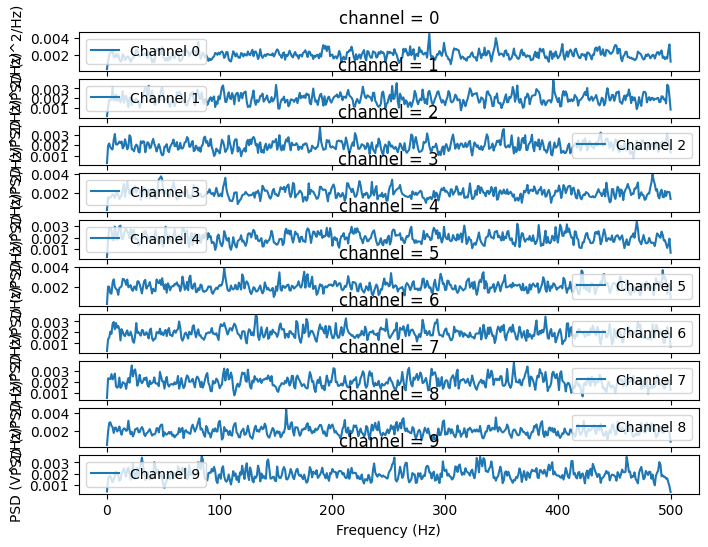

In [10]:
import numpy as np
from scipy import signal
import xarray as xr
import matplotlib.pyplot as plt

class EEGData:
    def __init__(self, n_channels, n_samples, fs, random_seed=None):
        # Initialize EEGData object with random EEG signal for one subject
        if random_seed:
            np.random.seed(random_seed)
        self.eeg_data = np.random.randn(n_channels, n_samples)
        self.fs = fs
        self.f, self.psd = signal.welch(self.eeg_data, fs=self.fs, nperseg=1000)
        self.psd_da = xr.DataArray(self.psd, dims=['channel', 'freq'], coords={'channel': range(n_channels), 'freq': self.f})

    def plot_psd(self):
        # Plot the PSD for each channel
        n_channels = len(self.psd_da.channel)
        fig, axes = plt.subplots(n_channels, 1, figsize=(8, 6), sharex=True)
        for i, ax in enumerate(axes):
            self.psd_da.sel(channel=i).plot(ax=ax, label=f"Channel {i}")
            ax.set_ylabel('PSD (V^2/Hz)')
            ax.legend()

        # Set the x-axis label for the last subplot
        axes[-1].set_xlabel('Frequency (Hz)')

        # Adjust the layout and save the figure
        fig.tight_layout()
        fig.savefig('psd.png')

eeg = EEGData(n_channels=10, n_samples=10000, fs=1000, random_seed=42)
eeg.plot_psd()


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import xarray as xr

class EEGData:
    def __init__(self, n_channels, n_samples, fs, random_seed=None):
        if random_seed:
            np.random.seed(random_seed)
        
        # Generate pink noise signal
        pink_noise = self._generate_pink_noise(n_channels, n_samples)
        
        # Normalize signal
        sd = np.std(pink_noise)
        normalized_data = pink_noise / sd
        
        self.eeg_data = normalized_data
        self.fs = fs
        self.f, self.psd = signal.welch(self.eeg_data, fs=self.fs, nperseg=1000)
        self.psd_da = xr.DataArray(self.psd, dims=['channel', 'freq'], coords={'channel': range(n_channels), 'freq': self.f})
        
    def plot_psd(self):
        # Plot the PSD for each channel
        n_channels = len(self.psd_da.channel)
        fig, axes = plt.subplots(n_channels, 1, figsize=(8, 6), sharex=True)
        for i, ax in enumerate(axes):
            self.psd_da.sel(channel=i).plot(ax=ax, label=f"Channel {i}")
            ax.set_ylabel('PSD (V^2/Hz)')
            ax.legend()
        
        # Set the x-axis label for the last subplot
        axes[-1].set_xlabel('Frequency (Hz)')
        
        # Adjust the layout and save the figure
        fig.tight_layout()
        fig.savefig('psd.png')
        
    def _generate_pink_noise(self, n_channels, n_samples):
        # Generate pink noise using the Voss-McCartney algorithm
        # 1/f^β noise for f ∈ (0, N/2), where β=1
        # White noise has β=0, red noise has β=2
        
        # The Voss-McCartney algorithm uses a bit-wise XOR logic to create an array
        # with a geometric series of length N – 1 with random offsets. Here N is the
        # next power of two that is greater than or equal to n_samples.
        
        N = int(2 ** np.ceil(np.log2(n_samples)))  # Next power of two
        
        # Create an N – 1 geometric series with values drawn from a normal distribution
        # with a mean of zero and a standard deviation of one
        x = np.random.normal(size=(N - 1,))
        
        # Create an N – 1 random sequence of integers {j_k} drawn from {0, 1,…, K – 1},
        # where K is the number of geometric elements
        K = 16  # Number of geometric elements
        ix = np.zeros((K, N - 1), dtype=np.int64)
        for k in range(K):
            ix[k] = (((np.arange(N - 1) + 1) // (2 ** k)) % 2) == 1
        j = np.dot(x, ix)  # Linearly combine the sequences using the geometric series
        
        # Compute the pink noise by cumulatively summing the points of the absolute of j
        y = np.cumsum(np.abs(j))
        
        # Replicate the same number of points for each channel and normalize by the standard deviation
        noise = np.tile(y[np.newaxis, :-1], (n_channels, 1))
        sd = np.std(noise)
        pink_noise = noise / sd


eeg = EEGData(n_channels=10, n_samples=10000, fs=1000, random_seed=42)
eeg.plot_psd()


ValueError: shapes (16383,) and (16,16383) not aligned: 16383 (dim 0) != 16 (dim 0)

In [18]:
import numpy as np

def voss(nrows, ncols=16):
    """Generates pink noise using the Voss-McCartney algorithm.
    
    Parameters:
    nrows (int): Number of samples to generate.
    ncols (int): Number of random sequences to generate. Higher values increase 
                 the frequency range of the resulting pink noise.
    
    Returns:
    ndarray: An array of shape (nrows,) containing pink noise.
    """
    prob = np.random.random(ncols)
    # Get the integers and their binary representation
    # for the geometric series
    k = np.arange(nrows)
    p = np.log2(k+1)
    p = np.floor(p)
    # Compute the numerator of the geometric series
    s = np.zeros(nrows)
    for i in range(ncols):
        np.putmask(s, p==i, np.random.normal())
    # Compute the denominator of the geometric series
    denominator = np.float_power(2, np.arange(ncols))
    # Sum over all the sequences and normalize
    noise = np.cumsum(s)/denominator.sum()
    noise -= noise.mean()
    noise /= noise.std()
    return noise

# Example usage: Generate 10 seconds of EEG data at 500Hz with 1/f characteristic
fs = 500
n_samples = fs*10
n_channels = 5
pink_noise = np.stack([voss(n_samples) for _ in range(n_channels)], axis=0)


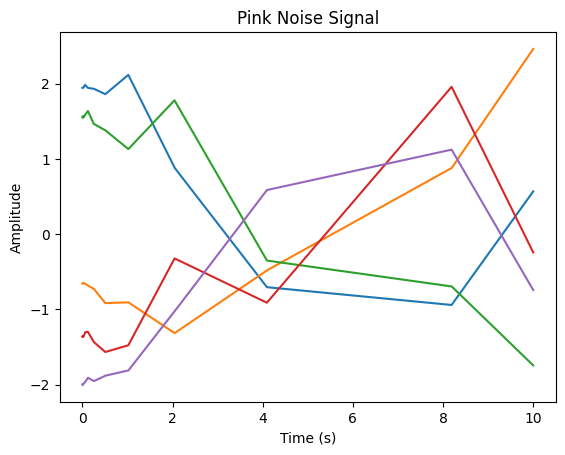

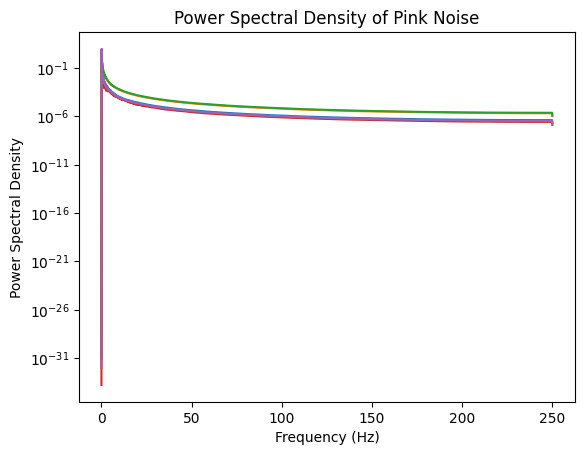

In [19]:
import matplotlib.pyplot as plt
from scipy import signal

# Define the sampling frequency and duration
fs = 500
duration = 10

# Generate the pink noise signal
n_samples = fs * duration
n_channels = 5
pink_noise = np.stack([voss(n_samples) for _ in range(n_channels)], axis=0)

# Define the time axis
t = np.arange(n_samples) / fs

# Calculate the power spectral density
f, Pxx_den = signal.periodogram(pink_noise, fs)

# Plot the signal in time domain
fig, ax1 = plt.subplots()
ax1.plot(t, pink_noise.T)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Pink Noise Signal')

# Plot the power spectral density
fig, ax2 = plt.subplots()
ax2.semilogy(f, Pxx_den.T)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Power Spectral Density')
ax2.set_title('Power Spectral Density of Pink Noise')
plt.show()


In [ ]:
from pathlib import Path
from glob import glob
import scipy.io as sio
import numpy as np
import re
import xarray as xr


class EEGDataset:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.files = [Path(p) for p in glob(f"{self.folder_path}/*/*EC.mat")]
        self.data_arrays_128freq = []
        self.data_arrays_52freq = []
        self.sub_128freq = []
        self.sub_52freq = []

    def process_files(self):
        for path_mat in self.files:
            sub = re.findall("sub-[0-9]{6}", str(path_mat))
            mat_content = sio.loadmat(path_mat)
            roi_names = [l.flatten()[0] for l in mat_content["RowNames"].flatten()]
            freqs = np.ndarray.squeeze(mat_content["Freqs"])
            tf = mat_content["TF"]
            da = xr.DataArray(
                tf,
                dims=['roi_names', 'sub', 'freqs'],
                coords={'roi_names': roi_names, 'sub': sub, 'freqs': freqs}
            )
            if freqs.size > 51:
                self.data_arrays_128freq.append(da)
                self.sub_128freq.append(sub)
            else:
                self.data_arrays_52freq.append(da)
                self.sub_52freq.append(sub)

        psd_concat_freq128 = xr.concat(
            self.data_arrays_128freq,
            dim='sub',
            coords='all',
            join='override'
        )
        psd_concat_freq128.to_netcdf("data/freq128.nc")

        psd_concat_freq52 = xr.concat(
            self.data_arrays_52freq,
            dim='sub',
            coords='all',
            join='override'
        )
        psd_concat_freq52.to_netcdf("data/freq52.nc")

    def get_sub_list(self):
        sub_list = self.sub_128freq + self.sub_52freq
        return sub_list



folder_path = '../data/lemon_rsEEG_dataset'
eeg_dataset = EEGDataset(folder_path)
eeg_dataset.process_files()
sub_list = eeg_dataset.get_sub_list()


In [ ]:
from pathlib import Path
from glob import glob
import scipy.io as sio
import numpy as np
import re
import xarray as xr


class EEGDataset:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.files = [Path(p) for p in glob(f"{self.folder_path}/*/*EC.mat")]
        self.data_arrays_128freq = []
        self.data_arrays_52freq = []
        self.sub_128freq = []
        self.sub_52freq = []

    def process_files(self):
        for path_mat in self.files:
            sub = re.findall("sub-[0-9]{6}", str(path_mat))
            mat_content = sio.loadmat(path_mat)
            roi_names = [l.flatten()[0] for l in mat_content["RowNames"].flatten()]
            freqs = np.ndarray.squeeze(mat_content["Freqs"])
            tf = mat_content["TF"]
            da = xr.DataArray(
                tf,
                dims=['roi_names', 'sub', 'freqs'],
                coords={'roi_names': roi_names, 'sub': sub, 'freqs': freqs}
            )
            if freqs.size > 51:
                self.data_arrays_128freq.append(da)
                self.sub_128freq.append(sub)
            else:
                self.data_arrays_52freq.append(da)
                self.sub_52freq.append(sub)

        psd_concat_freq128 = xr.concat(
            self.data_arrays_128freq,
            dim='sub',
            coords='all',
            join='override'
        )
        psd_concat_freq128.to_netcdf("data/freq128.nc")

        psd_concat_freq52 = xr.concat(
            self.data_arrays_52freq,
            dim='sub',
            coords='all',
            join='override'
        )
        psd_concat_freq52.to_netcdf("data/freq52.nc")

    def get_sub_list(self):
        sub_list = self.sub_128freq + self.sub_52freq
        return sub_list



folder_path = '../data/lemon_rsEEG_dataset'
eeg_dataset = EEGDataset(folder_path)
eeg_dataset.process_files()
sub_list = eeg_dataset.get_sub_list()


# Example classes

In [ ]:
import scipy.io
import xarray as xr


import numpy as np
from scipy import signal
import xarray as xr
import matplotlib.pyplot as plt


from pathlib import Path, PurePath
from glob import glob
import scipy.io  as sio
import numpy as np
import re
import xarray as xr
import pandas as pd


pandas_list = []
folder ='../data/lemon_rsEEG_dataset'
files_EC = [Path(p) for p in glob(f"{folder}/*/*EC.mat")]


data_arrays_128freq = []
data_arrays_52freq = []
sub_128freq = []
sub_52freq= []

for path_mat in files_short:
    sub = re.findall("sub-[0-9]{6}", str(path_mat))
    mat_content = sio.loadmat(path_mat)
    roi_names=  [l.flatten()[0] for l in mat_content["RowNames"].flatten()] #flatten
    freqs = np.ndarray.squeeze(mat_content["Freqs"])
    tf = mat_content["TF"]
    da = xr.DataArray(tf, dims=['roi_names', 'sub','freqs',], coords={'roi_names': roi_names, 'sub': sub,  'freqs': freqs})
    if freqs.size >  51:
        data_arrays_128freq.append(da)
        sub_128freq.append(sub)
    else:
        data_arrays_52freq.append(da)
        sub_52freq.append(sub)

psd_concat_freq128 = xr.concat(data_arrays_128freq , dim='sub', coords='all', join='override')
psd_concat_freq128.to_netcdf("data/freq128.nc")
display(f"psd_concat_freq128 is {len(sub_128freq)} elements")


psd_concat_freq52 = xr.concat(data_arrays_52freq  , dim='sub', coords='all', join='override')
psd_concat_freq52.to_netcdf("data/freq52.nc")
display(f"psd_concat_freq52 is {len(sub_52freq)} elements")




class EEGData:
    def __init__(self, n_channels, n_samples, fs, random_seed=None):
        # Initialize EEGData object with random EEG signal for one subject
        if random_seed:
            np.random.seed(random_seed)
        self.eeg_data = np.random.randn(n_channels, n_samples)
        self.fs = fs
        self.f, self.psd = signal.welch(self.eeg_data, fs=self.fs, nperseg=1000)
        self.psd_da = xr.DataArray(self.psd, dims=['channel', 'freq'], coords={'channel': range(n_channels), 'freq': self.f})

    def plot_psd(self):
        # Plot the PSD for each channel
        n_channels = len(self.psd_da.channel)
        fig, axes = plt.subplots(n_channels, 1, figsize=(8, 6), sharex=True)
        for i, ax in enumerate(axes):
            self.psd_da.sel(channel=i).plot(ax=ax, label=f"Channel {i}")
            ax.set_ylabel('PSD (V^2/Hz)')
            ax.legend()

        # Set the x-axis label for the last subplot
        axes[-1].set_xlabel('Frequency (Hz)')

        # Adjust the layout and save the figure
        fig.tight_layout()
        fig.savefig('psd.png')


def import_matlab_map_file(filename):
    """
    This function imports a matlab map file and converts it to xarray dataset.

    Parameters:
    filename (str): Name of the matlab file to be imported.

    Returns:
    xr.Dataset: xarray dataset containing the data from the imported matlab file.
    """
    mat_data = scipy.io.loadmat(filename, squeeze_me=True)

    data_vars = {}
    for var_name in mat_data:
        if var_name.startswith('__') or var_name.startswith('MATLAB'):
            continue
        var_array = mat_data[var_name]
        if var_array.ndim == 3:
            data_vars[var_name] = (('lat', 'lon', 'time'), var_array)
        
    lat = mat_data['lat']
    lon = mat_data['lon']
    times = mat_data['time']
    
    ds = xr.Dataset(data_vars, coords={'lat': lat, 'lon': lon, 'time': times})

    return ds


In [ ]:
import scipy.io
import xarray as xr


import numpy as np
from scipy import signal
import xarray as xr
import matplotlib.pyplot as plt


from pathlib import Path, PurePath
from glob import glob
import scipy.io  as sio
import numpy as np
import re
import xarray as xr
import pandas as pd


pandas_list = []
folder ='../data/lemon_rsEEG_dataset'
files_EC = [Path(p) for p in glob(f"{folder}/*/*EC.mat")]


data_arrays_128freq = []
data_arrays_52freq = []
sub_128freq = []
sub_52freq= []

for path_mat in files_short:
    sub = re.findall("sub-[0-9]{6}", str(path_mat))
    mat_content = sio.loadmat(path_mat)
    roi_names=  [l.flatten()[0] for l in mat_content["RowNames"].flatten()] #flatten
    freqs = np.ndarray.squeeze(mat_content["Freqs"])
    tf = mat_content["TF"]
    da = xr.DataArray(tf, dims=['roi_names', 'sub','freqs',], coords={'roi_names': roi_names, 'sub': sub,  'freqs': freqs})
    if freqs.size >  51:
        data_arrays_128freq.append(da)
        sub_128freq.append(sub)
    else:
        data_arrays_52freq.append(da)
        sub_52freq.append(sub)

psd_concat_freq128 = xr.concat(data_arrays_128freq , dim='sub', coords='all', join='override')
psd_concat_freq128.to_netcdf("data/freq128.nc")
display(f"psd_concat_freq128 is {len(sub_128freq)} elements")


psd_concat_freq52 = xr.concat(data_arrays_52freq  , dim='sub', coords='all', join='override')
psd_concat_freq52.to_netcdf("data/freq52.nc")
display(f"psd_concat_freq52 is {len(sub_52freq)} elements")




class EEGData:
    def __init__(self, n_channels, n_samples, fs, random_seed=None):
        # Initialize EEGData object with random EEG signal for one subject
        if random_seed:
            np.random.seed(random_seed)
        self.eeg_data = np.random.randn(n_channels, n_samples)
        self.fs = fs
        self.f, self.psd = signal.welch(self.eeg_data, fs=self.fs, nperseg=1000)
        self.psd_da = xr.DataArray(self.psd, dims=['channel', 'freq'], coords={'channel': range(n_channels), 'freq': self.f})

    def plot_psd(self):
        # Plot the PSD for each channel
        n_channels = len(self.psd_da.channel)
        fig, axes = plt.subplots(n_channels, 1, figsize=(8, 6), sharex=True)
        for i, ax in enumerate(axes):
            self.psd_da.sel(channel=i).plot(ax=ax, label=f"Channel {i}")
            ax.set_ylabel('PSD (V^2/Hz)')
            ax.legend()

        # Set the x-axis label for the last subplot
        axes[-1].set_xlabel('Frequency (Hz)')

        # Adjust the layout and save the figure
        fig.tight_layout()
        fig.savefig('psd.png')


def import_matlab_map_file(filename):
    """
    This function imports a matlab map file and converts it to xarray dataset.

    Parameters:
    filename (str): Name of the matlab file to be imported.

    Returns:
    xr.Dataset: xarray dataset containing the data from the imported matlab file.
    """
    mat_data = scipy.io.loadmat(filename, squeeze_me=True)

    data_vars = {}
    for var_name in mat_data:
        if var_name.startswith('__') or var_name.startswith('MATLAB'):
            continue
        var_array = mat_data[var_name]
        if var_array.ndim == 3:
            data_vars[var_name] = (('lat', 'lon', 'time'), var_array)
        
    lat = mat_data['lat']
    lon = mat_data['lon']
    times = mat_data['time']
    
    ds = xr.Dataset(data_vars, coords={'lat': lat, 'lon': lon, 'time': times})

    return ds


In [ ]:
import scipy.io
import xarray as xr


import numpy as np
from scipy import signal
import xarray as xr
import matplotlib.pyplot as plt


from pathlib import Path, PurePath
from glob import glob
import scipy.io  as sio
import numpy as np
import re
import xarray as xr
import pandas as pd


pandas_list = []
folder ='../data/lemon_rsEEG_dataset'
files_EC = [Path(p) for p in glob(f"{folder}/*/*EC.mat")]


data_arrays_128freq = []
data_arrays_52freq = []
sub_128freq = []
sub_52freq= []

for path_mat in files_short:
    sub = re.findall("sub-[0-9]{6}", str(path_mat))
    mat_content = sio.loadmat(path_mat)
    roi_names=  [l.flatten()[0] for l in mat_content["RowNames"].flatten()] #flatten
    freqs = np.ndarray.squeeze(mat_content["Freqs"])
    tf = mat_content["TF"]
    da = xr.DataArray(tf, dims=['roi_names', 'sub','freqs',], coords={'roi_names': roi_names, 'sub': sub,  'freqs': freqs})
    if freqs.size >  51:
        data_arrays_128freq.append(da)
        sub_128freq.append(sub)
    else:
        data_arrays_52freq.append(da)
        sub_52freq.append(sub)

psd_concat_freq128 = xr.concat(data_arrays_128freq , dim='sub', coords='all', join='override')
psd_concat_freq128.to_netcdf("data/freq128.nc")
display(f"psd_concat_freq128 is {len(sub_128freq)} elements")


psd_concat_freq52 = xr.concat(data_arrays_52freq  , dim='sub', coords='all', join='override')
psd_concat_freq52.to_netcdf("data/freq52.nc")
display(f"psd_concat_freq52 is {len(sub_52freq)} elements")




class EEGData:
    def __init__(self, n_channels, n_samples, fs, random_seed=None):
        # Initialize EEGData object with random EEG signal for one subject
        if random_seed:
            np.random.seed(random_seed)
        self.eeg_data = np.random.randn(n_channels, n_samples)
        self.fs = fs
        self.f, self.psd = signal.welch(self.eeg_data, fs=self.fs, nperseg=1000)
        self.psd_da = xr.DataArray(self.psd, dims=['channel', 'freq'], coords={'channel': range(n_channels), 'freq': self.f})

    def plot_psd(self):
        # Plot the PSD for each channel
        n_channels = len(self.psd_da.channel)
        fig, axes = plt.subplots(n_channels, 1, figsize=(8, 6), sharex=True)
        for i, ax in enumerate(axes):
            self.psd_da.sel(channel=i).plot(ax=ax, label=f"Channel {i}")
            ax.set_ylabel('PSD (V^2/Hz)')
            ax.legend()

        # Set the x-axis label for the last subplot
        axes[-1].set_xlabel('Frequency (Hz)')

        # Adjust the layout and save the figure
        fig.tight_layout()
        fig.savefig('psd.png')


def import_matlab_map_file(filename):
    """
    This function imports a matlab map file and converts it to xarray dataset.

    Parameters:
    filename (str): Name of the matlab file to be imported.

    Returns:
    xr.Dataset: xarray dataset containing the data from the imported matlab file.
    """
    mat_data = scipy.io.loadmat(filename, squeeze_me=True)

    data_vars = {}
    for var_name in mat_data:
        if var_name.startswith('__') or var_name.startswith('MATLAB'):
            continue
        var_array = mat_data[var_name]
        if var_array.ndim == 3:
            data_vars[var_name] = (('lat', 'lon', 'time'), var_array)
        
    lat = mat_data['lat']
    lon = mat_data['lon']
    times = mat_data['time']
    
    ds = xr.Dataset(data_vars, coords={'lat': lat, 'lon': lon, 'time': times})

    return ds


Using ideas from the above code write a class that use xarray datastructure for storing eeg timeseries, class should be able to read timeseries or PSD data from mat file and plot them. USe this class to read all files from the folder into instances of this class and store them in a list 

In [ ]:
from pathlib import Path, PurePath
from glob import glob
import scipy.io  as sio
import numpy as np
import re
import xarray as xr
import pandas as pd


pandas_list = []
folder ='../data/lemon_rsEEG_dataset'
files_EC = [Path(p) for p in glob(f"{folder}/*/*EC.mat")]


data_arrays_128freq = []
data_arrays_52freq = []
sub_128freq = []
sub_52freq= []

for path_mat in files_short:
    sub = re.findall("sub-[0-9]{6}", str(path_mat))
    mat_content = sio.loadmat(path_mat)
    roi_names=  [l.flatten()[0] for l in mat_content["RowNames"].flatten()] #flatten
    freqs = np.ndarray.squeeze(mat_content["Freqs"])
    tf = mat_content["TF"]
    da = xr.DataArray(tf, dims=['roi_names', 'sub','freqs',], coords={'roi_names': roi_names, 'sub': sub,  'freqs': freqs})
    if freqs.size >  51:
        data_arrays_128freq.append(da)
        sub_128freq.append(sub)
    else:
        data_arrays_52freq.append(da)
        sub_52freq.append(sub)

psd_concat_freq128 = xr.concat(data_arrays_128freq , dim='sub', coords='all', join='override')
psd_concat_freq128.to_netcdf("data/freq128.nc")
display(f"psd_concat_freq128 is {len(sub_128freq)} elements")


psd_concat_freq52 = xr.concat(data_arrays_52freq  , dim='sub', coords='all', join='override')
psd_concat_freq52.to_netcdf("data/freq52.nc")
display(f"psd_concat_freq52 is {len(sub_52freq)} elements")




'psd_concat_freq128 is 199 elements'

'psd_concat_freq52 is 2 elements'

In [ ]:
from pathlib import Path, PurePath
from glob import glob
import scipy.io  as sio
import numpy as np
import re
import xarray as xr
import pandas as pd


pandas_list = []
folder ='../data/lemon_rsEEG_dataset'
files_EC = [Path(p) for p in glob(f"{folder}/*/*EC.mat")]


data_arrays_128freq = []
data_arrays_52freq = []
sub_128freq = []
sub_52freq= []

for path_mat in files_short:
    sub = re.findall("sub-[0-9]{6}", str(path_mat))
    mat_content = sio.loadmat(path_mat)
    roi_names=  [l.flatten()[0] for l in mat_content["RowNames"].flatten()] #flatten
    freqs = np.ndarray.squeeze(mat_content["Freqs"])
    tf = mat_content["TF"]
    da = xr.DataArray(tf, dims=['roi_names', 'sub','freqs',], coords={'roi_names': roi_names, 'sub': sub,  'freqs': freqs})
    if freqs.size >  51:
        data_arrays_128freq.append(da)
        sub_128freq.append(sub)
    else:
        data_arrays_52freq.append(da)
        sub_52freq.append(sub)

psd_concat_freq128 = xr.concat(data_arrays_128freq , dim='sub', coords='all', join='override')
psd_concat_freq128.to_netcdf("data/freq128.nc")
display(f"psd_concat_freq128 is {len(sub_128freq)} elements")


psd_concat_freq52 = xr.concat(data_arrays_52freq  , dim='sub', coords='all', join='override')
psd_concat_freq52.to_netcdf("data/freq52.nc")
display(f"psd_concat_freq52 is {len(sub_52freq)} elements")




'psd_concat_freq128 is 199 elements'

'psd_concat_freq52 is 2 elements'